In [2]:
import pandas as pd
import numpy as np
import random
import seaborn as sns

In [3]:
# update_time 데이터프레임 생성, 10분 단위로 생성
date = pd.date_range('2023-10-01 00:00:00', periods=30, freq='D')

# 임시 데이터 만들기
q1 = pd.DataFrame()
q1['a'] = 1

# 데이터 합치기
q = pd.DataFrame(q1, index = date)

# datetimeindex를 변수로 변경
q.reset_index(drop=False, inplace=True)

# 필요없는 변수 삭제
del q['a']

# 변수명 변경
q.rename(columns = {'index' : 'update_time'}, inplace = True)
q

,update_time
0,2023-10-01
1,2023-10-02
2,2023-10-03
3,2023-10-04
4,2023-10-05
5,2023-10-06
6,2023-10-07
7,2023-10-08
8,2023-10-09
9,2023-10-10


##### 일주일 + 3일(342) 만들기
- 약 50개 정도의 noise

In [7]:
r_data = np.random.normal(36.3, 0.5, 30) 
print(pd.DataFrame(r_data).describe())

r = pd.DataFrame()
r['a'] = r_data
print(len(r[(r['a']<36)|(r['a']>37.5)]))

               0
count  30.000000
mean   36.321752
std     0.518405
min    34.785627
25%    36.009911
50%    36.362777
75%    36.701490
max    37.062105
7


In [327]:
r_data = np.random.normal(36.95, 0.5, 30) 
print(pd.DataFrame(r_data).describe())

r = pd.DataFrame()
r['a'] = r_data
print(len(r[(r['a']<36.1)|(r['a']>37.8)]))

               0
count  30.000000
mean   37.054447
std     0.418258
min    36.314802
25%    36.777684
50%    37.085544
75%    37.302671
max    37.925741
2


In [17]:
# 한 분포에서 추출하기
# train
df = pd.DataFrame()

# 각 변수 생성과 데이터프레임 병합
for i in range(1, 1001):
   # 각 변수별로 다른 random seed 설정
   np.random.seed(i)
   
   # 정규분포 랜덤 추출
   # 일주일치 1008개
   r_data = np.random.normal(80, 10, 1350) 
   r_data = r_data.astype(int)    
   
   # 변수명 생성 
   var_name = f'heart_rate{i}'
   
   # 데이터프레임에 변수 추가
   df[var_name] = r_data
   
   # event로 변수 생성
   df[f'event{i}'] = df[var_name].apply(lambda x: 1 if (x < 60 )|(x > 100) else 0 if 60 <= x <= 100 else x)
   
   # 변수(본포{i})마다 행 순서 바꾸기
   np.random.seed(i)
   df = df.sample(frac=1)
   
print(df.shape)

(1350, 2000)


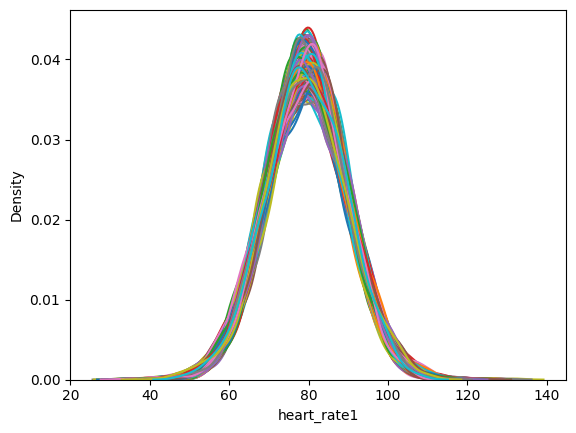

In [19]:
for i in range(1,1001):
    sns.kdeplot(df[f'heart_rate{i}'])

In [21]:
df.set_index(q['update_time'], inplace=True)
df

,heart_rate1,event1,heart_rate2,event2,heart_rate3,event3,heart_rate4,event4,heart_rate5,event5,...,heart_rate996,event996,heart_rate997,event997,heart_rate998,event998,heart_rate999,event999,heart_rate1000,event1000
update_time,,,,,,,,,,,,,,,,,,,,,
2023-10-01 00:00:00,72,0,101,1,77,0,77,0,95,0,...,83,0,82,0,64,0,66,0,84,0
2023-10-01 00:10:00,69,0,70,0,99,0,92,0,95,0,...,90,0,82,0,87,0,89,0,87,0
2023-10-01 00:20:00,92,0,90,0,100,0,85,0,81,0,...,87,0,88,0,90,0,78,0,87,0
2023-10-01 00:30:00,84,0,74,0,86,0,81,0,78,0,...,85,0,76,0,82,0,65,0,90,0
2023-10-01 00:40:00,85,0,75,0,67,0,83,0,103,1,...,71,0,84,0,81,0,85,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-10 08:10:00,83,0,95,0,77,0,63,0,97,0,...,84,0,100,0,83,0,86,0,88,0
2023-10-10 08:20:00,74,0,79,0,87,0,76,0,83,0,...,82,0,91,0,91,0,75,0,70,0
2023-10-10 08:30:00,83,0,89,0,100,0,92,0,77,0,...,88,0,78,0,66,0,89,0,84,0


In [22]:
df.to_csv('../data/normal_simulation.csv')